<a href="https://colab.research.google.com/github/RennanRnz/RennanRnz/blob/main/MOD10TAR3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
df = pd.read_csv('previsao_de_renda.csv')

df = df.drop(['Unnamed: 0', 'mau'], axis=1)

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

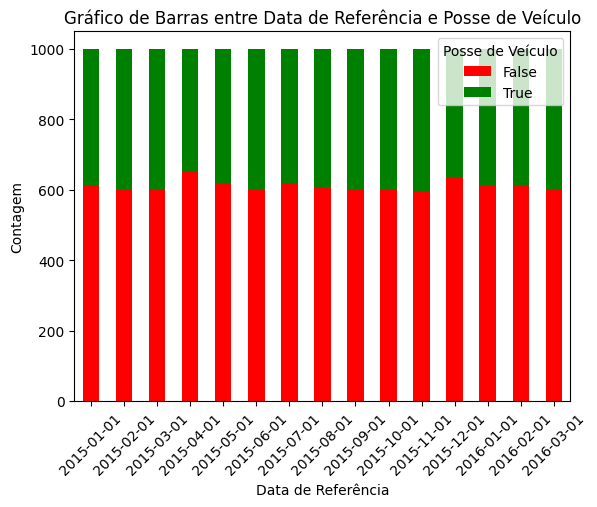

In [ ]:
data_counts = df.groupby(['data_ref', 'posse_de_veiculo']).size().unstack()

colors = ['red', 'green']

data_counts.plot(kind='bar', stacked=True, color=colors)

plt.xlabel('Data de Referência')
plt.ylabel('Contagem')
plt.title('Gráfico de Barras entre Data de Referência e Posse de Veículo')
plt.legend(title='Posse de Veículo', loc='upper right')
plt.xticks(range(len(data_counts.index)), data_counts.index, rotation=45)
plt.show()

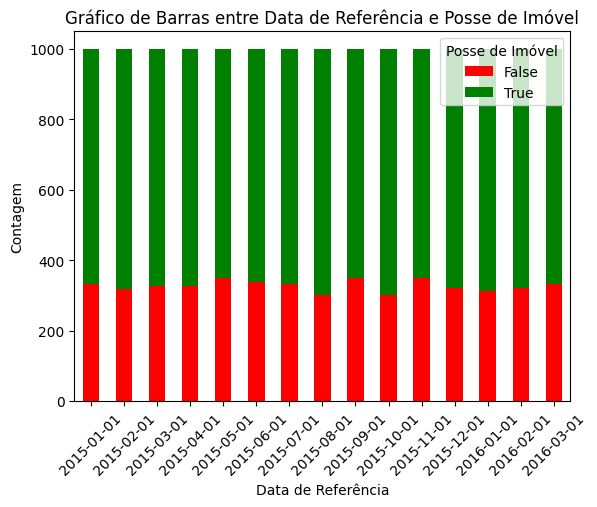

In [ ]:
data_counts1 = df.groupby(['data_ref', 'posse_de_imovel']).size().unstack()

colors = ['red', 'green']

data_counts1.plot(kind='bar', stacked=True, color=colors)

plt.xlabel('Data de Referência')
plt.ylabel('Contagem')
plt.title('Gráfico de Barras entre Data de Referência e Posse de Imóvel')
plt.legend(title='Posse de Imóvel', loc='upper right')
plt.xticks(range(len(data_counts1.index)), data_counts1.index, rotation=45)

plt.show()

A distribuição das variaveis ao longo do tempo se manteram relativamente estaveis.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

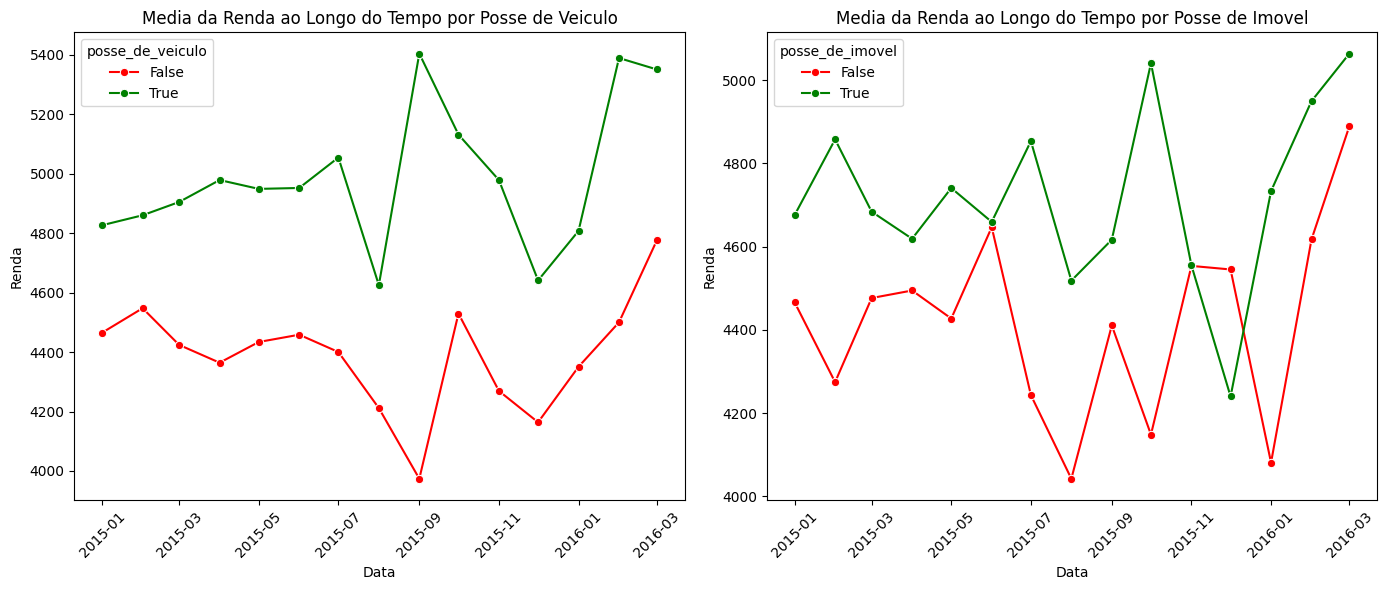

In [ ]:
df['data_ref'] = pd.to_datetime(df['data_ref'])

media_veiculo = df.groupby(['data_ref', 'posse_de_veiculo'])['renda'].mean().reset_index()
media_imovel = df.groupby(['data_ref', 'posse_de_imovel'])['renda'].mean().reset_index()

sns.set_palette(['red', 'green'])

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=media_veiculo, x='data_ref', y='renda', hue = 'posse_de_veiculo', marker='o')
plt.title('Media da Renda ao Longo do Tempo por Posse de Veiculo')
plt.xlabel('Data')
plt.ylabel('Renda')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.lineplot(data=media_imovel, x='data_ref', y='renda', hue = 'posse_de_imovel', marker='o')
plt.title('Media da Renda ao Longo do Tempo por Posse de Imovel')
plt.xlabel('Data')
plt.ylabel('Renda')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

A média entre os dois gráficos são relativamente diferentes, porem podemos traçar algumas métricas e identificar que existem alguns padrões, estes padrões podem servir de insight para uma futura modelagem.

-----------------------------------------------------